In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '../src/')
from dft1d import dft1d
plt.style.use(['science','notebook'])
# Author: Elvis do A. Soares
# Github: @elvissoares
# Date: 2022-10-06

# Defining the fluid properties

In [2]:
# fluid properties
sigma = 1.0
epsilon = 1.0
L = 7.5*sigma
# Temperature and Density 
kT = 1.2
rhob = 0.5925
# solid-fluid Steele potential parameters
sigmaw, epsw, Delta = sigma, 2*np.pi*epsilon, sigma/np.sqrt(2)

# Defining the functional 

## 1. HS functional

In [3]:
# Test the BFD functional 
mmfa = dft1d(fmtmethod='WBI',ljmethod='MMFA',geometry='Planar')
mmfa.Set_Geometry(L=L)
mmfa.Set_FluidProperties(sigma=sigma,epsilon=epsilon)
mmfa.Set_Temperature(kT)
mmfa.Set_BulkDensity(rhob)
mmfa.Set_External_Potential_Model(extpotmodel='steele',params=[sigmaw, epsw, Delta])

In [57]:
alpha = np.arange(0.2,0.3,0.001)
Nsteps = np.empty_like(alpha)

In [58]:
for i in range(alpha.size):
    mmfa.Set_InitialCondition()
    mmfa.Calculate_Equilibrium(alpha0=alpha[i],method='fire',atol=1.0e-5)
    Nsteps[i] = mmfa.Niter

In [62]:
np.min(Nsteps)

322.0

In [63]:
alpha[np.argmin(Nsteps)]

0.21000000000000002

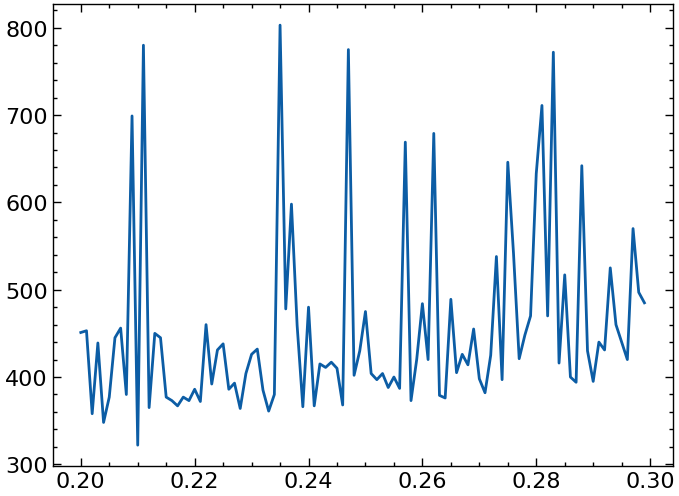

In [61]:
plt.plot(alpha,Nsteps)

In [64]:
dt = np.arange(0.15,0.2,0.001)
Nsteps2 = np.empty_like(dt)

In [65]:
for i in range(dt.size):
    mmfa.Set_InitialCondition()
    mmfa.Calculate_Equilibrium(alpha0=0.21,dt=dt[i],method='fire',atol=1.0e-5)
    Nsteps2[i] = mmfa.Niter

In [66]:
np.min(Nsteps2)

307.0

In [67]:
dt[np.argmin(Nsteps2)]

0.17500000000000002

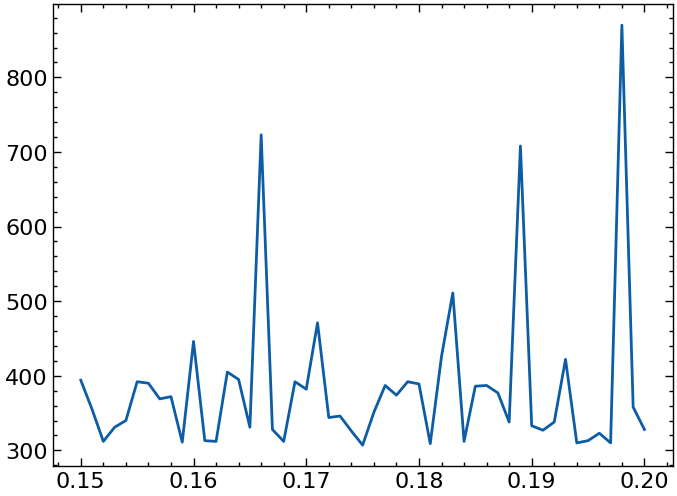

In [68]:
plt.plot(dt,Nsteps2)

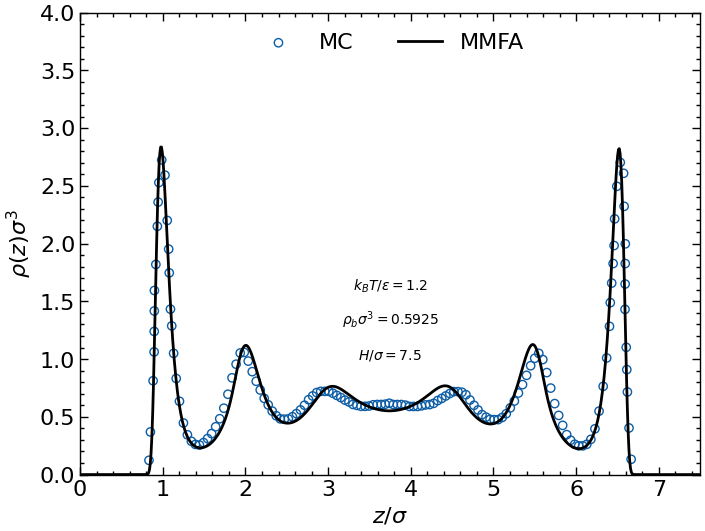

In [69]:
MCdata = np.loadtxt('MCdata/lj-slitpore-steele-T1.2-rhob0.5925-H7.5-GEMC.dat')
xMC,rhoMC = MCdata[:,0], MCdata[:,1]
plt.scatter(xMC,rhoMC,marker='o',edgecolors='C0',facecolors='none',label='MC')
plt.plot(mmfa.z,mmfa.rho,'-k',label='MMFA')
plt.ylim(0.0,4)
plt.xlim(0.0,L)
plt.xlabel(r'$z/\sigma$')
plt.ylabel(r'$\rho(z) \sigma^3$')
plt.text(0.5*L,1.0,r'$H/\sigma =$'+str(L),ha='center')
plt.text(0.5*L,1.3,r'$\rho_b \sigma^3 =$'+str(rhob),ha='center')
plt.text(0.5*L,1.6,r'$k_B T/\epsilon =$'+str(kT),ha='center')
plt.legend(loc='upper center',ncol=2)
plt.show()